In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
data = pd.read_csv("/content/drive/MyDrive/Concept and Technologies of AI/student.csv")


**• To - Do - 1:**
1. Read and Observe the Dataset.
2. Print top(5) and bottom(5) of the dataset {Hint: pd.head and pd.tail}.
3. Print the Information of Datasets. {Hint: pd.info}.
4. Gather the Descriptive info about the Dataset. {Hint: pd.describe}
5. Split your data into Feature (X) and Label (Y).

In [59]:
#Top 5 data of the dataset
data.head(5)


,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


In [60]:
#Bottom 5 data of the dataset
data.tail(5)

,Math,Reading,Writing
995,72,74,70
996,73,86,90
997,89,87,94
998,83,82,78
999,66,66,72


In [61]:
#Print the Information of Datasets. {Hint: pd.info}.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Math     1000 non-null   int64
 1   Reading  1000 non-null   int64
 2   Writing  1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


In [62]:
#Gather the Descriptive info about the Dataset. {Hint: pd.describe}
data.describe()

,Math,Reading,Writing
count,1000.000000,1000.000000,1000.000000
mean,67.290000,69.872000,68.616000
std,15.085008,14.657027,15.241287
min,13.000000,19.000000,14.000000
25%,58.000000,60.750000,58.000000
50%,68.000000,70.000000,69.500000
75%,78.000000,81.000000,79.000000
max,100.000000,100.000000,100.000000


In [63]:
#Split your data into Feature (X) and Label (Y).
X = data[['Math', 'Reading']]
Y = data['Writing']

**• To - Do - 2:**
1. To make the task easier - let’s assume there is no bias or intercept.
2. Create the following matrices:
    

In [64]:
W = np.array([[0.5],
              [0.5]])
Y_pred = np.dot(X,W)


**• To - Do - 3:**
1. Split the dataset into training and test sets.
2. You can use an 80-20 or 70-30 split, with 80% (or 70%) of the data used for training and the rest
for testing.

In [65]:
def train_test_split(X, Y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    test_split_size = int(len(X) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]

    X_train, X_test = X[train_indices], X[test_indices]
    Y_train, Y_test = Y[train_indices], Y[test_indices]

    return X_train, X_test, Y_train, Y_test

In [66]:
def cost_function(X, Y, W):
    """
    Parameters:
    This function finds the Mean Square Error.
    Input parameters:
    X: Feature Matrix (numpy array of shape (n_samples, n_features))
    Y: Target Matrix (numpy array of shape (n_samples, 1))
    W: Weight Matrix (numpy array of shape (n_features, 1))

    Output Parameters:
    cost: accumulated mean square error (float)
    """
    # Total no of data sets
    n = len(Y)

    # Predicted values
    Y_pred = np.dot(X, W)

    # Difference between predicted and actual values
    error = Y_pred - Y

    # Mean Squared Error
    cost = (1/(2 * n)) * np.mean(error ** 2)

    return cost


In [67]:
# Test case
X_test = np.array([[1, 2], [3, 4], [5, 6]])
Y_test = np.array([3, 7, 11])
W_test = np.array([1, 1])
cost = cost_function(X_test, Y_test, W_test)
if cost == 0:
  print("Proceed Further")
else:
  print("something went wrong: Reimplement a cost function")
print("Cost function output:", cost_function(X_test, Y_test, W_test))

Proceed Further
Cost function output: 0.0


In [68]:
def gradient_descent(X, Y, W, alpha, iterations):
    """
    Perform gradient descent to optimize the parameters of a linear regression model.

    Parameters:
    X (numpy.ndarray): Feature matrix (m x n).
    Y (numpy.ndarray): Target vector (m x 1).
    W (numpy.ndarray): Initial guess for parameters (n x 1).
    alpha (float): Learning rate.
    iterations (int): Number of iterations for gradient descent.

    Returns:
    tuple: A tuple containing the final optimized parameters (W_update) and the history of cost values.
        W_update (numpy.ndarray): Updated parameters (n x 1).
        cost_history (list): History of cost values over iterations.
    """
    # Initialize cost history
    cost_history = [0] * iterations
    # Number of samples
    m = len(Y)

    # Start the gradient descent iterations
    W_update = W  # Start with the initial guess for W
    for iteration in range(iterations):
        # Step 1: Hypothesis Values
        Y_pred = np.dot(X, W_update)

        # Step 2: Difference between Hypothesis and Actual Y
        loss = Y_pred - Y

        # Step 3: Gradient Calculation
        dw = (1 / m) * np.dot(X.T, loss)

        # Step 4: Updating Values of W using Gradient
        W_update = W_update - alpha * dw

        # Step 5: New Cost Value
        cost = cost_function(X, Y, W_update)
        cost_history[iteration] = cost

    return W_update, cost_history


In [69]:
# Generate random test data
np.random.seed(0) # For reproducibility
X = np.random.rand(100, 3) # 100 samples, 3 features
Y = np.random.rand(100)
W = np.random.rand(3) # Initial guess for parameters
# Set hyperparameters
alpha = 0.01
iterations = 1000
# Test the gradient_descent function
final_params, cost_history = gradient_descent(X, Y, W, alpha, iterations)
# Print the final parameters and cost history
print("Final Parameters:", final_params)
print("Cost History:", cost_history)

Final Parameters: [0.20551667 0.54295081 0.10388027]
Cost History: [0.0010711197094660154, 0.00106348805999399, 0.0010559826315680618, 0.0010486012948320558, 0.001041341956428534, 0.0010342025583900626, 0.001027181077540776, 0.001020275524908062, 0.001013483945144193, 0.001006804415957737, 0.001000235047554587, 0.0009937739820884378, 0.0009874193931205609, 0.00098116948508871, 0.0009750224927850095, 0.000968976680842672, 0.0009630303432313952, 0.0009571818027612913, 0.0009514294105952065, 0.0009457715457692842, 0.0009402066147216397, 0.0009347330508290016, 0.0009293493139511913, 0.0009240538899833018, 0.0009188452904154543, 0.000913722051899995, 0.0009086827358260123, 0.0009037259279010502, 0.0008988502377398918, 0.0008940542984603008, 0.0008893367662855953, 0.0008846963201539432, 0.0008801316613342668, 0.0008756415130486386, 0.0008712246201010665, 0.0008668797485125506, 0.0008626056851623206, 0.0008584012374351278, 0.0008542652328745133, 0.0008501965188419301, 0.000846193962181636, 0.

In [70]:
import numpy as np

def rmse(Y, Y_pred):
    """
    This Function calculates the Root Mean Squares Error (RMSE).

    Parameters:
    Y (numpy.ndarray): Array of actual (target) dependent variables.
    Y_pred (numpy.ndarray): Array of predicted dependent variables.

    Returns:
    float: Root Mean Squared Error (RMSE).
    """
    rmse = np.sqrt(np.mean((Y-Y_pred)**2)) # Your Code Here

    return rmse


In [71]:
import numpy as np

def r2(Y, Y_pred):
    """
    This Function calculates the R-squared error (coefficient of determination).

    Parameters:
    Y (numpy.ndarray): Array of actual (target) dependent variables.
    Y_pred (numpy.ndarray): Array of predicted dependent variables.

    Returns:
    float: R-squared error.
    """
    # Mean of actual values
    mean_y = np.mean(Y)

    # Total sum of squares (SS_tot): Variability of the actual values
    ss_tot = np.sum((Y - mean_y) ** 2)

    # Residual sum of squares (SS_res): Variability unexplained by the model
    ss_res = np.sum((Y - Y_pred) ** 2)

    # R-squared formula
    r2 = 1 - (ss_res / ss_tot)

    return r2


**3.1.5 Step -5- Main Function to Integrate All Steps:**<br>
In this section, we will create a main function that integrates the data loading, preprocessing, cost function,
gradient descent, and model evaluation. This will help in running the entire workflow with minimal effort.
• Objective:
The objective of the main function is to execute the full process, from loading the data to performing
linear regression using gradient descent and evaluating the results using metrics like RMSE and R2
.

• To - Do:
We will define a function that:
1. Loads the data and splits it into training and test sets.
2. Prepares the feature matrix (X) and target vector (Y).
3. Defines the weight matrix (W) and initializes the learning rate and number of iterations.
4. Calls the gradient descent function to learn the parameters.
5. Evaluates the model using RMSE and R2
.
Re-write the following code or Write your own:

Final Weights: [0.34973248 0.64484523]
Cost History (First 10 iterations): [2.8741632221049644, 2.342448764417942, 1.9099392590767954, 1.5581251991416298, 1.2719505531551878, 1.039168420971411, 0.8498169103336097, 0.6957928035987259, 0.5705047690718524, 0.4685912756393453]
RMSE on Test Set: 5.224589785890595
R-Squared on Test Set: 0.8868710151151797


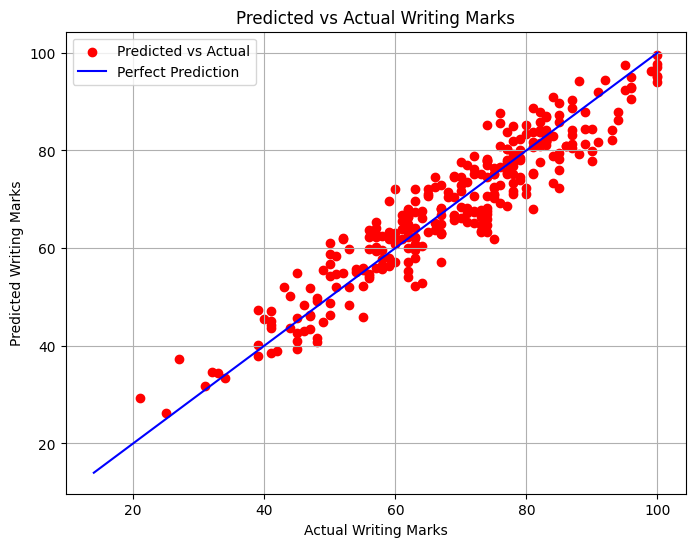

In [80]:


def main():
    # # Step 1: Load the dataset
    # data = pd.read_csv('student.csv')

    # Step 2: Split the data into features (X) and target (Y)
    X = data[['Math', 'Reading']].values  # Features: Math and Reading marks
    Y = data['Writing'].values  # Target: Writing marks

    # Step 3: Split the data into training and test sets (70% train, 30% test)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_seed=42)

    # Step 4: Initialize weights (W) to zeros, learning rate, and number of iterations
    W = np.zeros(X_train.shape[1])  # Initialize weights for each feature
    alpha = 0.00001 # Learning rate
    iterations = 1000  # Number of iterations for gradient descent

    # Step 5: Perform Gradient Descent
    W_optimal, cost_history = gradient_descent(X_train, Y_train, W, alpha, iterations)

    # Step 6: Make predictions on the test set
    Y_pred = np.dot(X_test, W_optimal)

    # Step 7: Evaluate the model using RMSE and R-Squared
    model_rmse = rmse(Y_test, Y_pred)
    model_r2 = r2(Y_test, Y_pred)

    # Step 8: Output the results
    print("Final Weights:", W_optimal.flatten())
    print("Cost History (First 10 iterations):", cost_history[:10])
    print("RMSE on Test Set:", model_rmse)
    print("R-Squared on Test Set:", model_r2)

    # Plotting the predictions vs actual values
    plt.figure(figsize=(8, 6))
    plt.scatter(Y_test, Y_pred, color='red', label='Predicted vs Actual')
    plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='blue', linestyle='solid', label='Perfect Prediction')
    plt.title("Predicted vs Actual Writing Marks")
    plt.xlabel("Actual Writing Marks")
    plt.ylabel("Predicted Writing Marks")
    plt.legend()
    plt.grid(True)
    plt.show()

# Execute the main function
if __name__ == "__main__":
    main()
